In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
train = pd.read_csv("/content/sample_data/fraudTrain.csv")
test = pd.read_csv("/content/sample_data/fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,35058.000000,3.505700e+04,35057.000000,35057.000000,35057.000000,35057.000000,3.505700e+04,3.505700e+04,35057.000000,35056.000000,35056.000000
mean,8872.129642,4.228896e+17,69.379183,48768.760704,38.506703,-90.224815,9.170407e+04,1.346384e+09,38.504734,-90.222427,0.005106
std,5243.089097,1.317920e+18,145.199746,26897.792081,5.119871,13.878586,3.093849e+05,2.292418e+07,5.150338,13.892746,0.071275
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.042510,-166.629875,0.000000
25%,4382.000000,1.800466e+14,9.520000,26041.000000,34.590600,-96.790900,7.590000e+02,1.325863e+09,34.712267,-96.873084,0.000000
50%,8764.000000,3.520550e+15,46.960000,48088.000000,39.342600,-87.458100,2.518000e+03,1.326289e+09,39.335171,-87.407418,0.000000
75%,13146.000000,4.642255e+15,82.320000,72011.000000,41.846700,-80.158000,2.112500e+04,1.371966e+09,41.922069,-80.195787,0.000000
max,19475.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372270e+09,66.669356,-66.960745,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(19476, 23)
(15582, 23)


In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  35058.000000  3.505700e+04  35057.000000  35057.000000  35057.000000   
mean    8872.129642  4.228896e+17     69.379183  48768.760704     38.506703   
std     5243.089097  1.317920e+18    145.199746  26897.792081      5.119871   
min        0.000000  6.041621e+10      1.000000   1257.000000     20.027100   
25%     4382.000000  1.800466e+14      9.520000  26041.000000     34.590600   
50%     8764.000000  3.520550e+15     46.960000  48088.000000     39.342600   
75%    13146.000000  4.642255e+15     82.320000  72011.000000     41.846700   
max    19475.000000  4.992346e+18  11872.210000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  35057.000000  3.505700e+04  3.505700e+04  35057.000000  35056.000000   
mean     -90.224815  9.170407e+04  1.346384e+09     38.504734    -90.222427   
std       13.878586  3.093849e+05  2.292418e+07    

In [ ]:
test.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2020-06-21 12:14:25  2291163933867244   
1               1   2020-06-21 12:14:33  3573030041201292   
2               2   2020-06-21 12:14:53  3598215285024754   
3               3   2020-06-21 12:15:15  3591919803438423   
4               4   2020-06-21 12:15:17  3526826139003047   
...           ...                   ...               ...   
15577       15577   2020-06-26 18:05:18   213157767990030   
15578       15578   2020-06-26 18:05:19  4586810168620942   
15579       15579   2020-06-26 18:05:32  3514897282719543   
15580       15580   2020-06-26 18:05:48  4452366298769043   
15581       15581   2020-06-26 18:06:10     4259996134423   

                                   merchant        category     amt     first  \
0                     fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                      fraud_Sporer-Keebler   personal_care   29.84    Joanne   
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28    Ashley   
3                         fraud_Haley Group        misc_pos   60.05     Brian   
4                     fraud_Johnston-Casper          travel    3.19    Nathan   
...                                     ...             ...     ...       ...   
15577   fraud_Schneider, Hayes and Nikolaus     food_dining   55.89      Tara   
15578   fraud_Bernhard, Grant and Langworth    shopping_pos  107.97  Michelle   
15579     fraud_Romaguera, Wehner and Tromp       kids_pets   70.27    Steven   
15580       fraud_Reichert, Huels and Hoppe    shopping_net    6.39     Linda   
15581                    fraud_Medhurst Inc            home   47.27     Julie   

           last gender                         street  ...      lat      long  \
0       Elliott      M              351 Darlene Green  ...  33.9659  -80.9355   
1      Williams      F               3638 Marsh Union  ...  40.3207 -110.4360   
2         Lopez      F           9333 Valentine Point  ...  40.6729  -73.5365   
3      Williams      M    32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4        Massey      M       5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...         ...    ...                            ...  ...      ...       ...   
15577  Campbell      F     05050 Rogers Well Apt. 439  ...  41.6060 -109.2300   
15578   Gregory      F             6983 Carrillo Isle  ...  32.5486  -80.3070   
15579  Faulkner      M   841 Cheryl Centers Suite 115  ...  42.9580  -77.3083   
15580     Davis      F       6602 Ortiz Pine Apt. 179  ...  32.0758  -96.7010   
15581   Johnson      F  9331 Robert Passage Suite 327  ...  38.1485  -98.6408   

       city_pop                     job         dob  \
0        333497     Mechanical engineer  1968-03-19   
1           302  Sales professional, IT  1990-01-17   
2         34496       Librarian, public  1970-10-21   
3         54767            Set designer  1987-07-25   
4          1126      Furniture designer  1955-07-06   
...         ...                     ...         ...   
15577     27971         Music therapist  1984-08-01   
15578      2408  Sales professional, IT  1997-07-05   
15579     10717          Cytogeneticist  1952-10-13   
15580      1563       Financial adviser  1978-03-04   
15581       215       Probation officer  1968-11-22   

                              trans_num   unix_time  merch_lat  merch_long  \
0      2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1      324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2      c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3      2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4      57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                 ...         ...        ...         ...   
15577  91e1ab648de605bdcc8b16b808ad9c32  1372269918  42.376537 -110.103197   
1557

In [ ]:
train.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time        cc_num  \
0               0   2019-01-01 00:00:18  2.703186e+15   
1               1   2019-01-01 00:00:44  6.304233e+11   
2               2   2019-01-01 00:00:51  3.885949e+13   
3               3   2019-01-01 00:01:16  3.534094e+15   
4               4   2019-01-01 00:03:06  3.755342e+14   
...           ...                   ...           ...   
19471       19471   2019-01-12 20:36:38  3.564839e+15   
19472       19472   2019-01-12 20:36:55  4.836999e+15   
19473       19473   2019-01-12 20:37:04  3.050162e+13   
19474       19474   2019-01-12 20:38:55  5.456713e+15   
19475       19475    2019-01-12 20:39:2           NaN   

                                  merchant       category     amt      first  \
0               fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge  entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist       misc_pos   41.96      Tyler   
...                                    ...            ...     ...        ...   
19471             fraud_Altenwerth-Kilback           home   18.44     Robert   
19472  fraud_Mosciski, Ziemann and Farrell   shopping_net    9.33      Susan   
19473                     fraud_Stark-Koss           home   21.82     Amanda   
19474                    fraud_Gerhold LLC           home    4.52     Pamela   
19475                                  NaN            NaN     NaN        NaN   

           last gender                              street  ...      lat  \
0         Banks      F                      561 Perry Cove  ...  36.0788   
1          Gill      F        43039 Riley Greens Suite 393  ...  48.8878   
2       Sanchez      M            594 White Dale Suite 530  ...  42.1808   
3         White      M         9443 Cynthia Court Apt. 038  ...  46.2306   
4        Garcia      M                    408 Bradley Rest  ...  38.4207   
...         ...    ...                                 ...  ...      ...   
19471    Ashley      M  1250 Christopher Prairie Suite 016  ...  38.0460   
19472     Hardy      F                     516 Brown Parks  ...  46.0062   
19473     Smith      F                    180 Graves Shore  ...  32.6786   
19474  Matthews      F           36659 Smith Club Apt. 080  ...  36.1486   
19475       NaN    NaN                                 NaN  ...      NaN   

           long  city_pop                                          job  \
0      -81.1781    3495.0                    Psychologist, counselling   
1     -118.2105     149.0            Special educational needs teacher   
2     -112.2620    4154.0                  Nature conservation officer   
3     -112.1138    1939.0                              Patent attorney   
4      -79.4629      99.0               Dance movement psychotherapist   
...         ...       ...                                          ...   
19471 -122.1866     198.0  Armed forces training and education officer   
19472  -86.2555    6469.0                          Trade mark attorney   
19473  -81.2455     302.0                     Magazine features editor   
19474 -105.6648     247.0                   Architectural technologist   
19475       NaN       NaN                                          NaN   

              dob                         trans_num     unix_time  merch_lat  \
0      1988-03-09  0b242abb623afc578575680df30655b9  1.325376e+09  36.011293   
1      1978-06-21  1f76529f8574734946361c461b024d99  1.325376e+09  49.159047   
2      1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704   
3      1967-01-12  6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331   
4      1986-03-28  a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999   
...           ...                       

In [ ]:
train.describe

<bound method NDFrame.describe of        Unnamed: 0 trans_date_trans_time        cc_num  \
0               0   2019-01-01 00:00:18  2.703186e+15   
1               1   2019-01-01 00:00:44  6.304233e+11   
2               2   2019-01-01 00:00:51  3.885949e+13   
3               3   2019-01-01 00:01:16  3.534094e+15   
4               4   2019-01-01 00:03:06  3.755342e+14   
...           ...                   ...           ...   
19471       19471   2019-01-12 20:36:38  3.564839e+15   
19472       19472   2019-01-12 20:36:55  4.836999e+15   
19473       19473   2019-01-12 20:37:04  3.050162e+13   
19474       19474   2019-01-12 20:38:55  5.456713e+15   
19475       19475    2019-01-12 20:39:2           NaN   

                                  merchant       category     amt      first  \
0               fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge  entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist       misc_pos   41.96      Tyler   
...                                    ...            ...     ...        ...   
19471             fraud_Altenwerth-Kilback           home   18.44     Robert   
19472  fraud_Mosciski, Ziemann and Farrell   shopping_net    9.33      Susan   
19473                     fraud_Stark-Koss           home   21.82     Amanda   
19474                    fraud_Gerhold LLC           home    4.52     Pamela   
19475                                  NaN            NaN     NaN        NaN   

           last gender                              street  ...      lat  \
0         Banks      F                      561 Perry Cove  ...  36.0788   
1          Gill      F        43039 Riley Greens Suite 393  ...  48.8878   
2       Sanchez      M            594 White Dale Suite 530  ...  42.1808   
3         White      M         9443 Cynthia Court Apt. 038  ...  46.2306   
4        Garcia      M                    408 Bradley Rest  ...  38.4207   
...         ...    ...                                 ...  ...      ...   
19471    Ashley      M  1250 Christopher Prairie Suite 016  ...  38.0460   
19472     Hardy      F                     516 Brown Parks  ...  46.0062   
19473     Smith      F                    180 Graves Shore  ...  32.6786   
19474  Matthews      F           36659 Smith Club Apt. 080  ...  36.1486   
19475       NaN    NaN                                 NaN  ...      NaN   

           long  city_pop                                          job  \
0      -81.1781    3495.0                    Psychologist, counselling   
1     -118.2105     149.0            Special educational needs teacher   
2     -112.2620    4154.0                  Nature conservation officer   
3     -112.1138    1939.0                              Patent attorney   
4      -79.4629      99.0               Dance movement psychotherapist   
...         ...       ...                                          ...   
19471 -122.1866     198.0  Armed forces training and education officer   
19472  -86.2555    6469.0                          Trade mark attorney   
19473  -81.2455     302.0                     Magazine features editor   
19474 -105.6648     247.0                   Architectural technologist   
19475       NaN       NaN                                          NaN   

              dob                         trans_num     unix_time  merch_lat  \
0      1988-03-09  0b242abb623afc578575680df30655b9  1.325376e+09  36.011293   
1      1978-06-21  1f76529f8574734946361c461b024d99  1.325376e+09  49.159047   
2      1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704   
3      1967-01-12  6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331   
4      1986-03-28  a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999   
...           ...                     

In [ ]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
print(train['is_fraud'].value_counts())

is_fraud
0.0    19343
1.0      132
Name: count, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

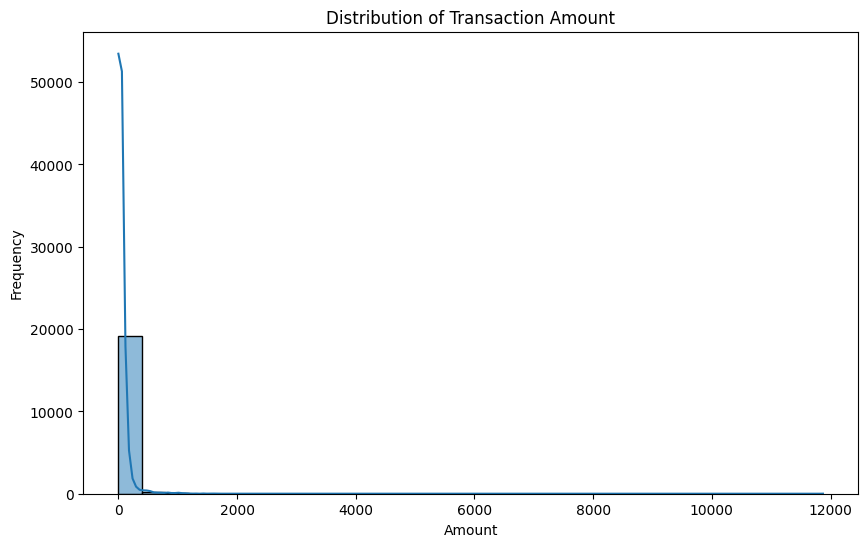

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

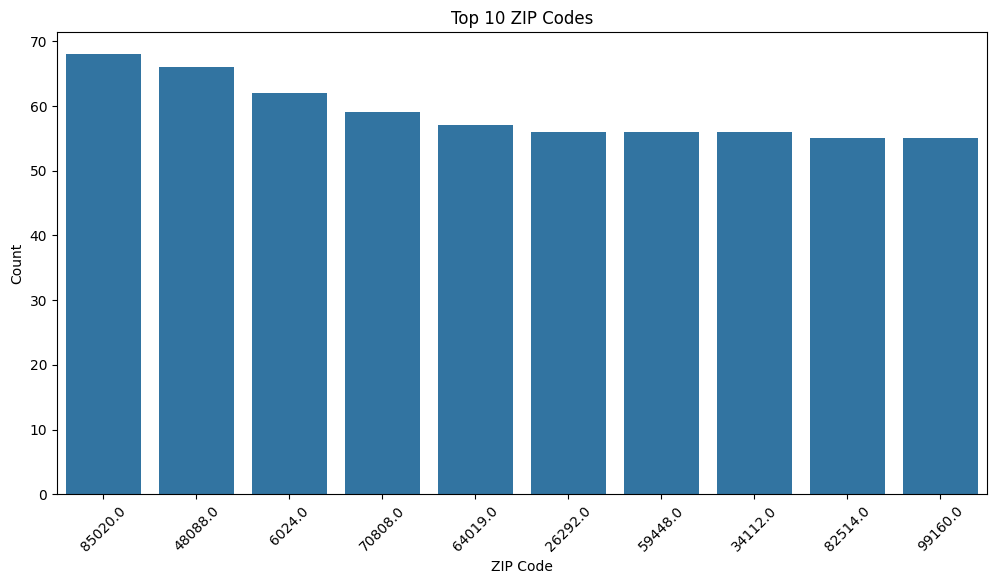

In [ ]:
top_zip_codes = train['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train[train['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

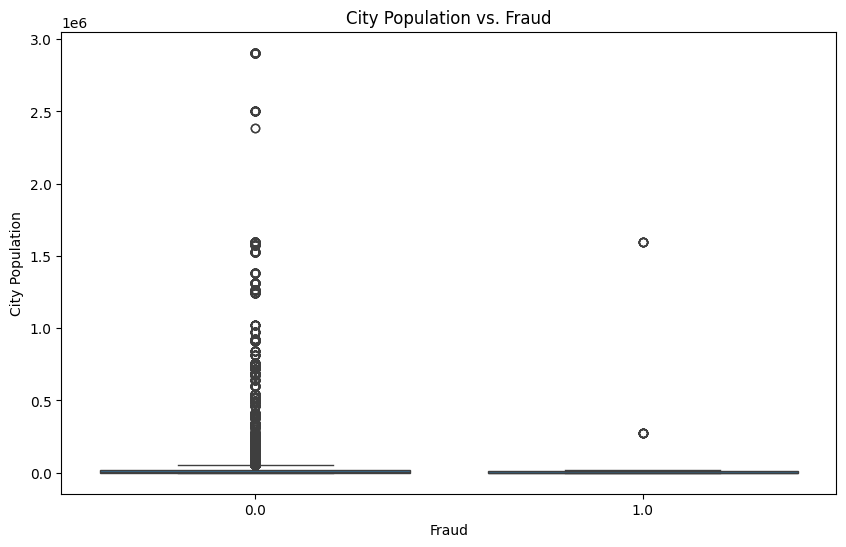

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=train)
plt.title('City Population vs. Fraud')
plt.xlabel('Fraud')
plt.ylabel('City Population')
plt.show()

In [ ]:
train.fillna(-999, inplace=True)
test.fillna(-999, inplace=True)

In [ ]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train[features]
y = train['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3876
         1.0       0.88      0.75      0.81        20

    accuracy                           1.00      3896
   macro avg       0.94      0.87      0.90      3896
weighted avg       1.00      1.00      1.00      3896



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
